In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import scipy.stats as scs
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("co2_mm_gl.csv")

In [4]:
df.head(5)

,year,month,decimal,average,trend
0,1980,1,1980.042,338.55,337.93
1,1980,2,1980.125,339.27,338.22
2,1980,3,1980.208,339.60,338.25
3,1980,4,1980.292,339.99,338.37
4,1980,5,1980.375,340.43,338.90


In [5]:
df.dtypes

year         int64
month        int64
decimal    float64
average    float64
trend      float64
dtype: object

In [6]:
for i in range(len(df)):
    if df.iloc[i,1] == 10 or df.iloc[i,1] == 11 or df.iloc[i,1] == 12:
        df.iloc[i,0] = str(df.iloc[i,0]) + "-" + str(df.iloc[i,1])+ "-" + "01"
    else: 
        df.iloc[i,0] = str(df.iloc[i,0]) + "-0" + str(df.iloc[i,1])+ "-" + "01"

In [7]:
df = df.set_index("year")
df.index.name = None
df.drop(['month', 'decimal', 'trend'], axis=1, inplace=True)
df = df.rename({'average': 'co2'}, axis=1)


In [8]:
df.index = pd.to_datetime(df.index)
df

,co2
1980-01-01,338.55
1980-02-01,339.27
1980-03-01,339.60
1980-04-01,339.99
1980-05-01,340.43
...,...
2021-05-01,416.12
2021-06-01,415.31
2021-07-01,413.55
2021-08-01,412.19


In [9]:
data = sm.datasets.co2.load_pandas()
df2 = data.data
df2

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [10]:
df2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [11]:
df.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', length=501, freq=None)

In [12]:
# The 'MS' string groups the data in buckets by start of the month
ts = df2['co2'].resample('MS').mean()
ts = ts.fillna(ts.bfill())
ts.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2001-03-01', '2001-04-01', '2001-05-01', '2001-06-01',
               '2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
               '2001-11-01', '2001-12-01'],
              dtype='datetime64[ns]', length=526, freq='MS')

In [13]:
part1 = ts[:262]
part2 =  df.squeeze()

In [14]:
ts = pd.concat([part1, part2], axis=0)

In [15]:
ts.to_csv('ppm_ts.csv', index=True)

In [60]:
ts.isnull().sum()

0

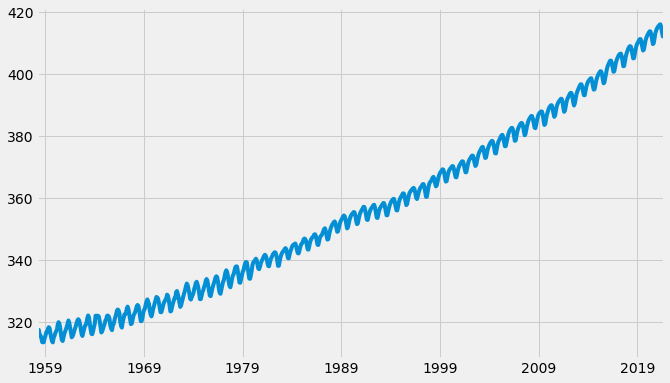

In [61]:
plt.close()
ts.plot(figsize=(10, 6))
plt.show()

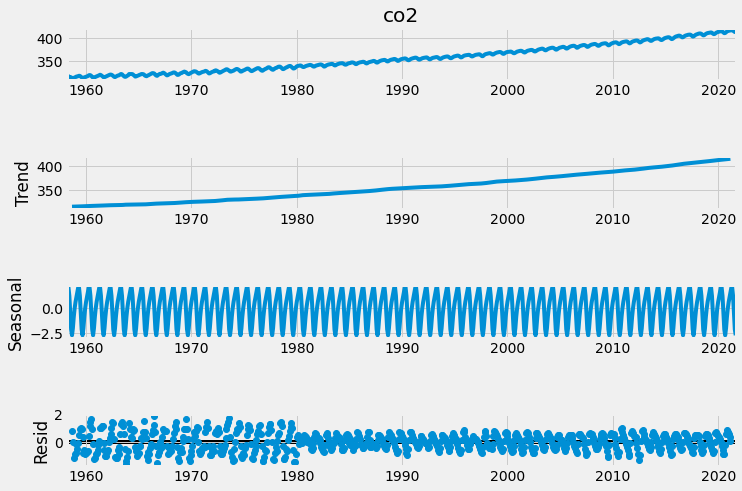

In [62]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
from pylab import rcParams
#rcParams['figure.figsize'] = 12, 10
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

In [63]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [64]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            model = sm.tsa.statespace.SARIMAX(ts,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 model - AIC:187.39769971666385


In [65]:
best_model = sm.tsa.statespace.SARIMAX(ts,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 1, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
results = best_model.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                  763
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -89.699
Date:                            Fri, 24 Dec 2021   AIC                            187.398
Time:                                    01:04:49   BIC                            205.803
Sample:                                03-01-1958   HQIC                           194.496
                                     - 09-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0947      0.019      4.908      0.000       0.057       0.132
ar.S.L12      -0.0006      0.000   

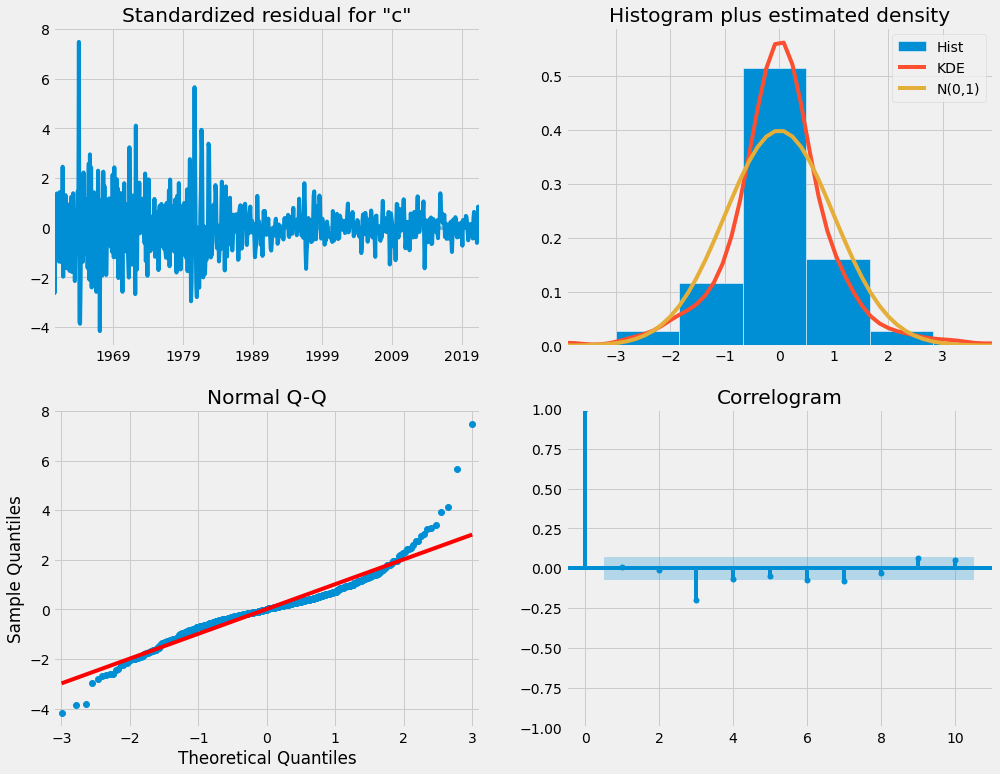

In [66]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [74]:
pred = results.get_prediction(start=pd.to_datetime('2017-09-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head(5)

,lower co2,upper co2
2017-09-01,402.224498,403.292365
2017-10-01,403.540828,404.608695
2017-11-01,405.073531,406.141398
2017-12-01,406.172090,407.239957
2018-01-01,406.946555,408.014421


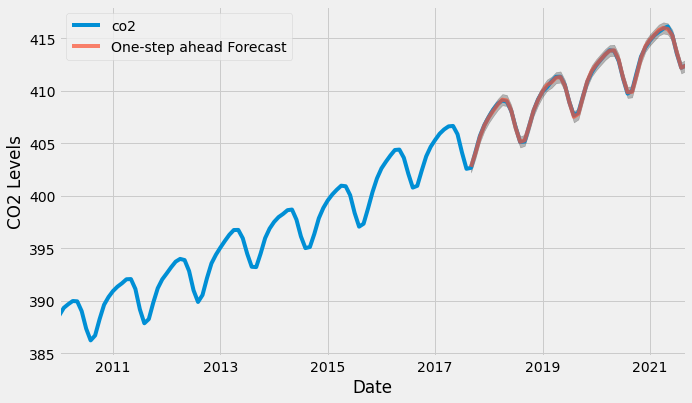

In [77]:
plt.close()
axis = ts['2010':].plot(figsize=(10, 6))
pred.predicted_mean.plot(ax=axis, label='One-step ahead Forecast', alpha=0.7)
axis.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
axis.set_xlabel('Date')
axis.set_ylabel('CO2 Levels')
plt.legend(loc='best')
plt.show()

In [78]:
ts_forecasted = pred.predicted_mean
ts_truth = ts['2017-09-01':]

# Compute the mean sqaure error
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In [79]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-09-01'), dynamic=True, full_results=True)
pred_dynami_ci = pred_dynamic.conf_int()

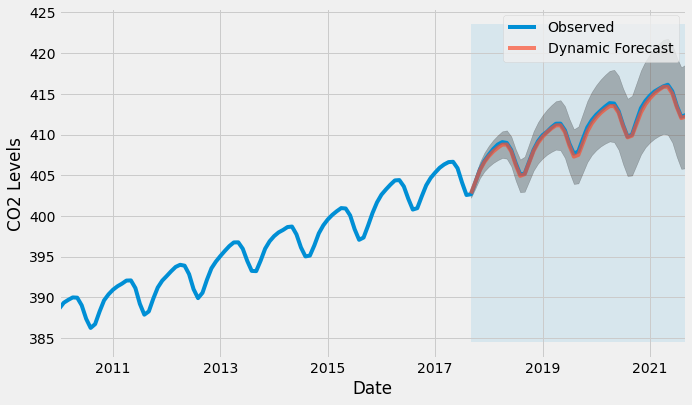

In [81]:
axis = ts['2010':].plot(label='Observed', figsize=(10, 6))
pred_dynamic.predicted_mean.plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynami_ci.index, pred_dynami_ci.iloc[:, 0], pred_dynami_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2017-09-01'), ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Date')
axis.set_ylabel('CO2 Levels')
plt.legend(loc='best')
plt.show()
plt.close()

In [82]:
ts_forecasted = pred_dynamic.predicted_mean
ts_truth = ts['2017-09-01':]

# Compute the mean square error
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [83]:
# Get forecast 500 steps ahead in future
n_steps = 500
pred_uc_99 = results.get_forecast(steps=n_steps, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = results.get_forecast(steps=n_steps, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals of forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [84]:
n_steps = 500
idx = pd.date_range(ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all.head()

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
2021-09-01,413.937732,413.403799,413.403799,414.471666,414.471666
2021-10-01,415.439453,414.647809,414.647809,416.231097,416.231097
2021-11-01,416.393342,415.409311,415.409311,417.377372,417.377372
2021-12-01,417.084395,415.939873,415.939873,418.228918,418.228918
2022-01-01,417.612747,416.327622,416.327622,418.897873,418.897873


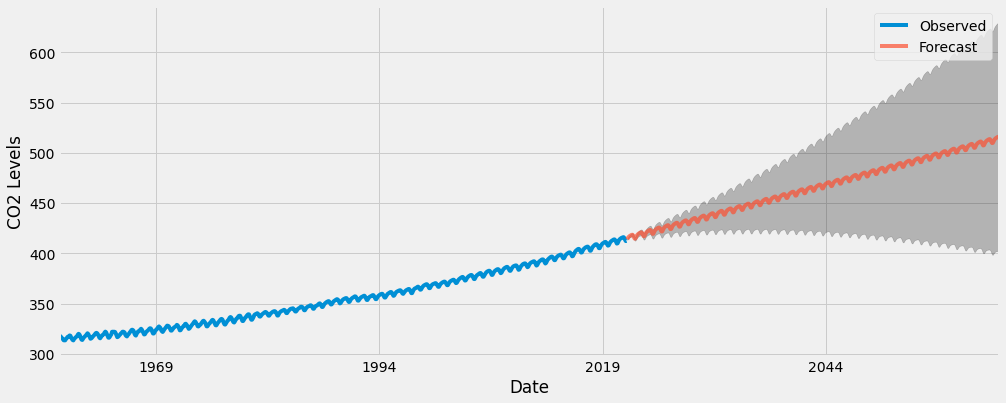

In [85]:
plt.close()
axis = ts.plot(label='Observed', figsize=(15, 6))
pred_uc_95.predicted_mean.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_ci_95.index, pred_ci_95.iloc[:, 0], pred_ci_95.iloc[:, 1], color='k', alpha=.25)
#axis.fill_between(pred_ci_99.index, pred_ci_99.iloc[:, 0], pred_ci_99.iloc[:, 1], color='b', alpha=.25)
axis.set_xlabel('Date')
axis.set_ylabel('CO2 Levels')
plt.legend(loc='best')
plt.show()

In [86]:
fc_all

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
2021-09-01,413.937732,413.403799,413.403799,414.471666,414.471666
2021-10-01,415.439453,414.647809,414.647809,416.231097,416.231097
2021-11-01,416.393342,415.409311,415.409311,417.377372,417.377372
2021-12-01,417.084395,415.939873,415.939873,418.228918,418.228918
2022-01-01,417.612747,416.327622,416.327622,418.897873,418.897873
...,...,...,...,...,...
2062-12-01,514.581050,401.977827,401.977827,627.184273,627.184273
2063-01-01,515.109385,402.183005,402.183005,628.035766,628.035766
2063-02-01,515.553522,402.304906,402.304906,628.802139,628.802139
2063-03-01,515.919420,402.349482,402.349482,629.489357,629.489357


In [87]:
fc_all.to_csv('fc_all.csv', index=True)

In [72]:
co2_emissions = pd.read_csv("global-co2-fossil-plus-land-use.csv")

In [73]:
co2_emissions

,Entity,Code,Year,Fossil fuel + land use emissions (GtCO2),Land use emissions (GtCO2),Fossil fuel and industry emissions (GtCO2)
0,World,OWID_WRL,1850,2734430450,2537534418,196896032
1,World,OWID_WRL,1851,2813745945,2614940969,198804976
2,World,OWID_WRL,1852,2861828605,2654277661,207550944
3,World,OWID_WRL,1853,2920302218,2703092970,217209248
4,World,OWID_WRL,1854,2985473346,2730334370,255138976
...,...,...,...,...,...,...
166,World,OWID_WRL,2016,39156033820,3703574520,35452459300
167,World,OWID_WRL,2017,39588617000,3662879316,35925737690
168,World,OWID_WRL,2018,40503678490,3857538704,36646139790
169,World,OWID_WRL,2019,40527913570,3825410667,36702502900


In [74]:
co2_emissions.Year = co2_emissions.Year.astype(str) + "-12-31"
co2_emissions = co2_emissions.set_index("Year") 
co2_emissions.index.name = None
co2_emissions = co2_emissions.rename({'Fossil fuel + land use emissions (GtCO2)': 'co2'}, axis=1)
co2_emissions.index = pd.to_datetime(co2_emissions.index)
co2_emissions.drop(['Entity', 'Code', 'Land use emissions (GtCO2)', 'Fossil fuel and industry emissions (GtCO2)'], axis=1, inplace=True)
co2_emissions

,co2
1850-12-31,2734430450
1851-12-31,2813745945
1852-12-31,2861828605
1853-12-31,2920302218
1854-12-31,2985473346
...,...
2016-12-31,39156033820
2017-12-31,39588617000
2018-12-31,40503678490
2019-12-31,40527913570


In [75]:
ts = co2_emissions.squeeze()
ts.isnull().sum()

0

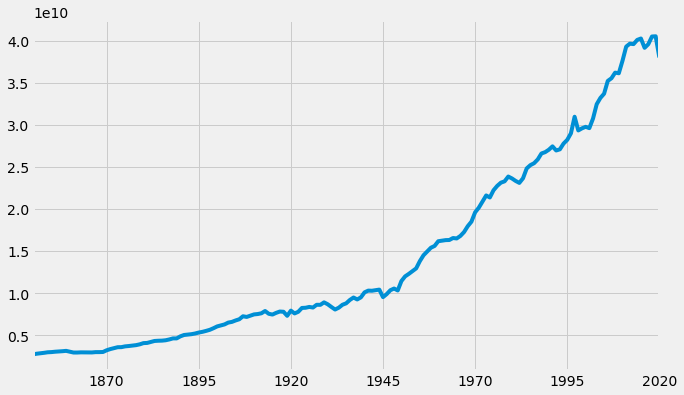

In [76]:
plt.close()
ts.plot(figsize=(10, 6))
plt.show()

In [77]:
ts = ts[ts.index.year > 1920]

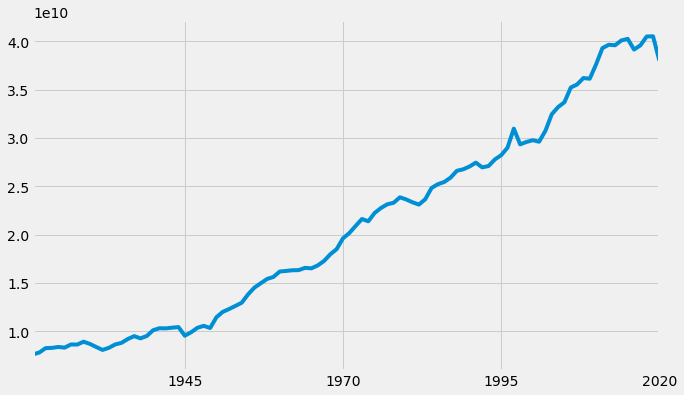

In [78]:
plt.close()
ts.plot(figsize=(10, 6))
plt.show()

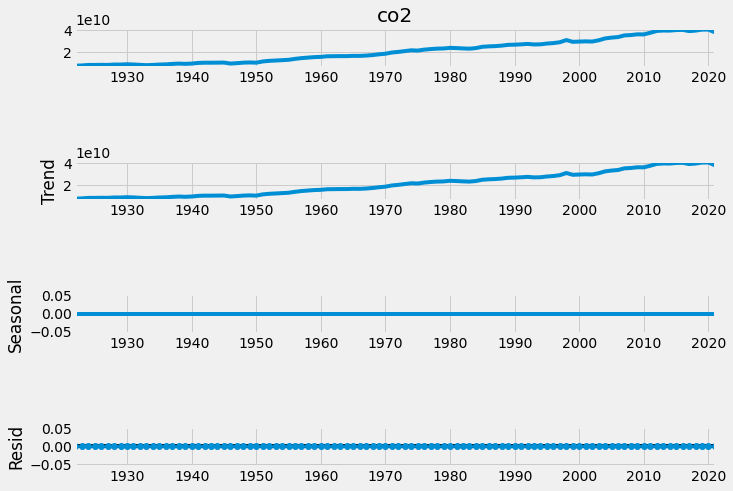

In [79]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
from pylab import rcParams
#rcParams['figure.figsize'] = 12, 10
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

In [80]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [81]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            model = sm.tsa.statespace.SARIMAX(ts,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 model - AIC:3195.5730554470383


In [82]:
best_model = sm.tsa.statespace.SARIMAX(ts,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 1, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
results = best_model.fit()
print(results.summary().tables[0])
print(results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                  100
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1593.787
Date:                            Sat, 25 Dec 2021   AIC                           3195.573
Time:                                    01:03:02   BIC                           3204.735
Sample:                                12-31-1921   HQIC                          3199.224
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2360      0.184      1.280      0.201      -0.125       0.597
ar.S.L12      -0.6246      0.245   

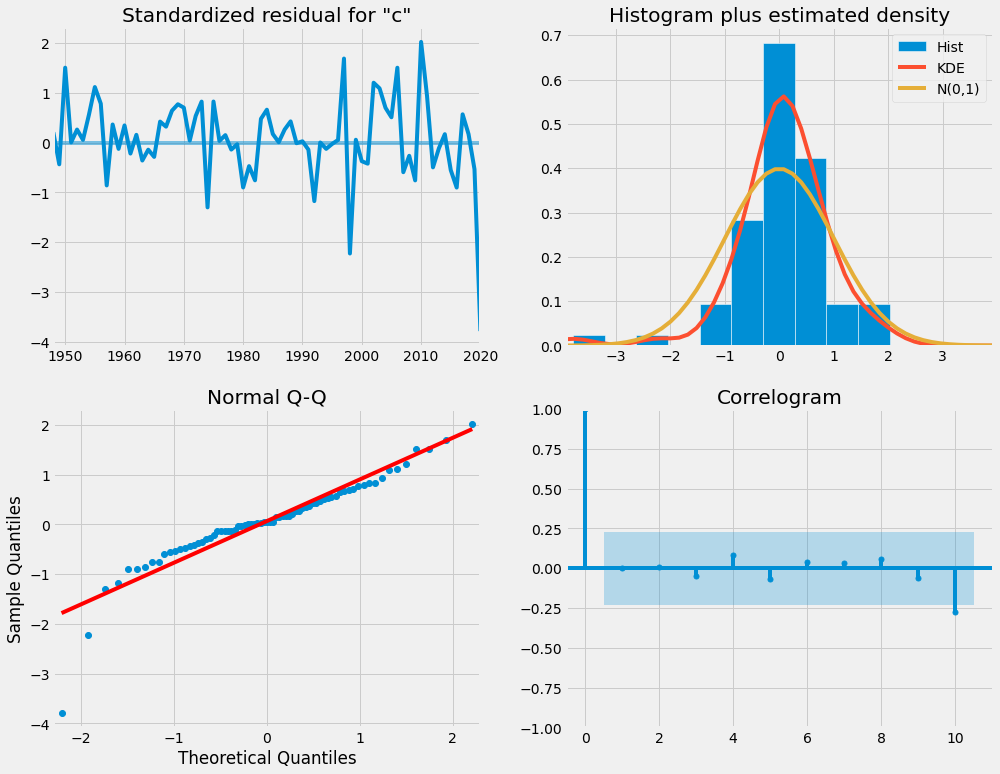

In [83]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [84]:
pred = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head(5)

,lower co2,upper co2
2000-12-31,2.842170e+10,3.175639e+10
2001-12-31,2.830833e+10,3.164302e+10
2002-12-31,2.806550e+10,3.140019e+10
2003-12-31,2.986493e+10,3.319962e+10
2004-12-31,3.094074e+10,3.427543e+10


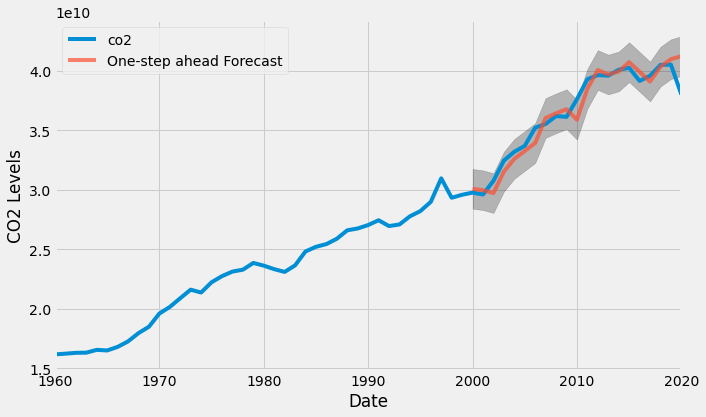

In [89]:
plt.close()
axis = ts['1960':].plot(figsize=(10, 6))
pred.predicted_mean.plot(ax=axis, label='One-step ahead Forecast', alpha=0.7)
axis.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
axis.set_xlabel('Date')
axis.set_ylabel('CO2 Levels')
plt.legend(loc='best')
plt.show()

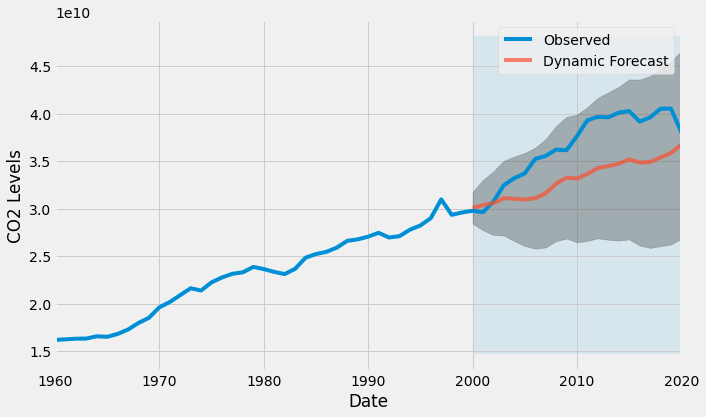

In [90]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2000-12-31'), dynamic=True, full_results=True)
pred_dynami_ci = pred_dynamic.conf_int()
axis = ts['1960':].plot(label='Observed', figsize=(10, 6))
pred_dynamic.predicted_mean.plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynami_ci.index, pred_dynami_ci.iloc[:, 0], pred_dynami_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2000-12-31'), ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Date')
axis.set_ylabel('CO2 Levels')
plt.legend(loc='best')
plt.show()
plt.close()


In [96]:
# Get forecast 40 steps ahead in future
n_steps = 45
pred_uc_99 = results.get_forecast(steps=n_steps, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = results.get_forecast(steps=n_steps, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals of forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

idx = pd.date_range(ts.index[-1], periods=n_steps, freq='AS')
fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all.tail()


,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
2061-01-01,5.277076e+10,3.345363e+10,3.345363e+10,7.208789e+10,7.208789e+10
2062-01-01,5.346295e+10,3.365159e+10,3.365159e+10,7.327431e+10,7.327431e+10
2063-01-01,5.418547e+10,3.389192e+10,3.389192e+10,7.447902e+10,7.447902e+10
2064-01-01,5.379493e+10,3.303037e+10,3.303037e+10,7.455949e+10,7.455949e+10
2065-01-01,5.421011e+10,3.298500e+10,3.298500e+10,7.543522e+10,7.543522e+10


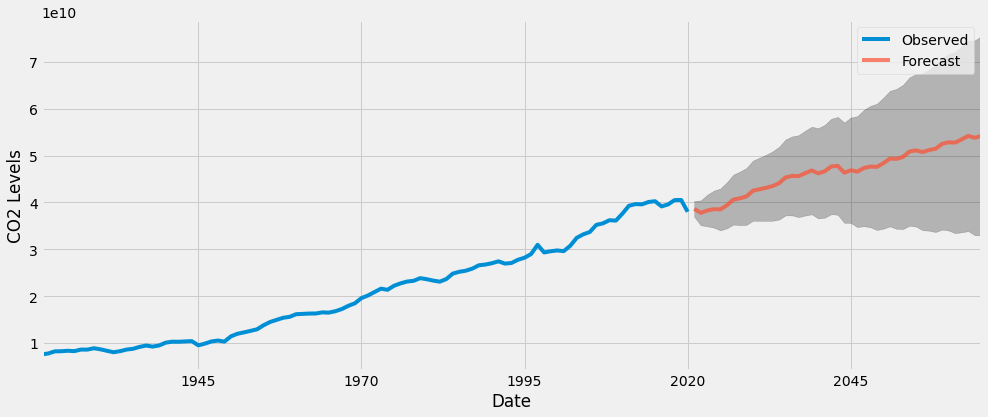

In [97]:
plt.close()
axis = ts.plot(label='Observed', figsize=(15, 6))
pred_uc_95.predicted_mean.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_ci_95.index, pred_ci_95.iloc[:, 0], pred_ci_95.iloc[:, 1], color='k', alpha=.25)
#axis.fill_between(pred_ci_99.index, pred_ci_99.iloc[:, 0], pred_ci_99.iloc[:, 1], color='b', alpha=.25)
axis.set_xlabel('Date')
axis.set_ylabel('CO2 Levels')
plt.legend(loc='best')
plt.show()

In [98]:
fc_all.to_csv('fc_all2.csv', index=True)